Training Linear Regression...
Training Gradient Boosting...


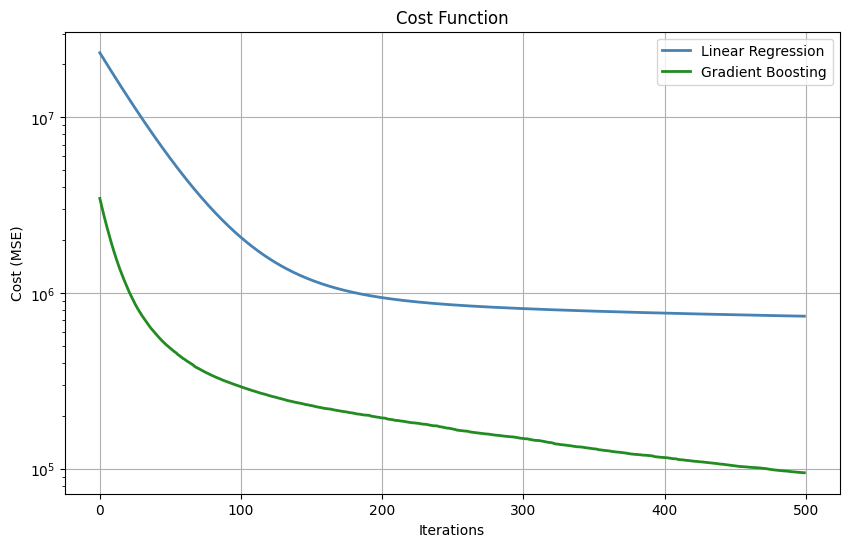

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor


data = pd.read_csv("day.csv")
data = data[['yr', 'season','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','cnt']]

X = data.drop(columns=['cnt'])
y = data['cnt']

categorical_cols = ['season','mnth','weekday','weathersit']
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


scaler = StandardScaler()
numeric_cols = ['temp','yr','atemp','hum','windspeed','holiday','workingday']
X_encoded[numeric_cols] = scaler.fit_transform(X_encoded[numeric_cols])

X_np = np.asarray(X_encoded, dtype=np.float64)
y_np = np.asarray(y, dtype=np.float64).reshape(-1, 1)

def predict(X, w, b):
    return np.dot(X, w) + b

def compute_cost(X, y, w, b):
    m = X.shape[0]
    predictions = predict(X, w, b)
   
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost

def compute_gradient(X, y, w, b):
    m = X.shape[0]
    predictions = predict(X, w, b)
    error = predictions - y
    dj_dw = (1/m) * np.dot(X.T, error)
    dj_db = (1/m) * np.sum(error)
    return dj_dw, dj_db

def gradient_descent_with_history(X, y, w_in, b_in, alpha, num_iters):
    w = w_in.copy()
    b = b_in
    J_history = [] 
    
    for i in range(num_iters):
        # Calculate gradients
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        
        # Update parameters
        w -= alpha * dj_dw
        b -= alpha * dj_db
        
        # Save Cost
        if i < 100000: 
            cost = compute_cost(X, y, w, b)
            J_history.append(cost)
            
    return w, b, J_history

alpha = 0.01
lr_iterations = 500 
n = X_np.shape[1]
w_in = np.zeros((n, 1))
b_in = 0.0

print("Training Linear Regression...")
w_final, b_final, lr_cost_history = gradient_descent_with_history(X_np, y_np, w_in, b_in, alpha, lr_iterations)

print("Training Gradient Boosting...")


gb_iterations = 500 

gb_model = GradientBoostingRegressor(
    n_estimators=gb_iterations, 
    learning_rate=0.05, 
    max_depth=3, 
    random_state=42,
    loss='squared_error' # equivalent to MSE
)

gb_model.fit(X_np, y_np.ravel())

gb_cost_history = gb_model.train_score_

plt.figure(figsize=(10, 6))


plt.plot(range(len(lr_cost_history)), [x * 2 for x in lr_cost_history], label='Linear Regression', color='#4682B4', linewidth=2)


plt.plot(range(len(gb_cost_history)), gb_cost_history, label='Gradient Boosting', color='#228B22', linewidth=2)

plt.title('Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.legend()
plt.grid(True)
plt.yscale('log') 
plt.show()